In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('matches.csv')
data.shape

(5060, 28)

## 1) Relationship between Expected and Actual Performance

c:\Users\rishi\anaconda3\envs\Main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rishi\anaconda3\envs\Main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rishi\anaconda3\envs\Main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rishi\anaconda3\envs\Main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

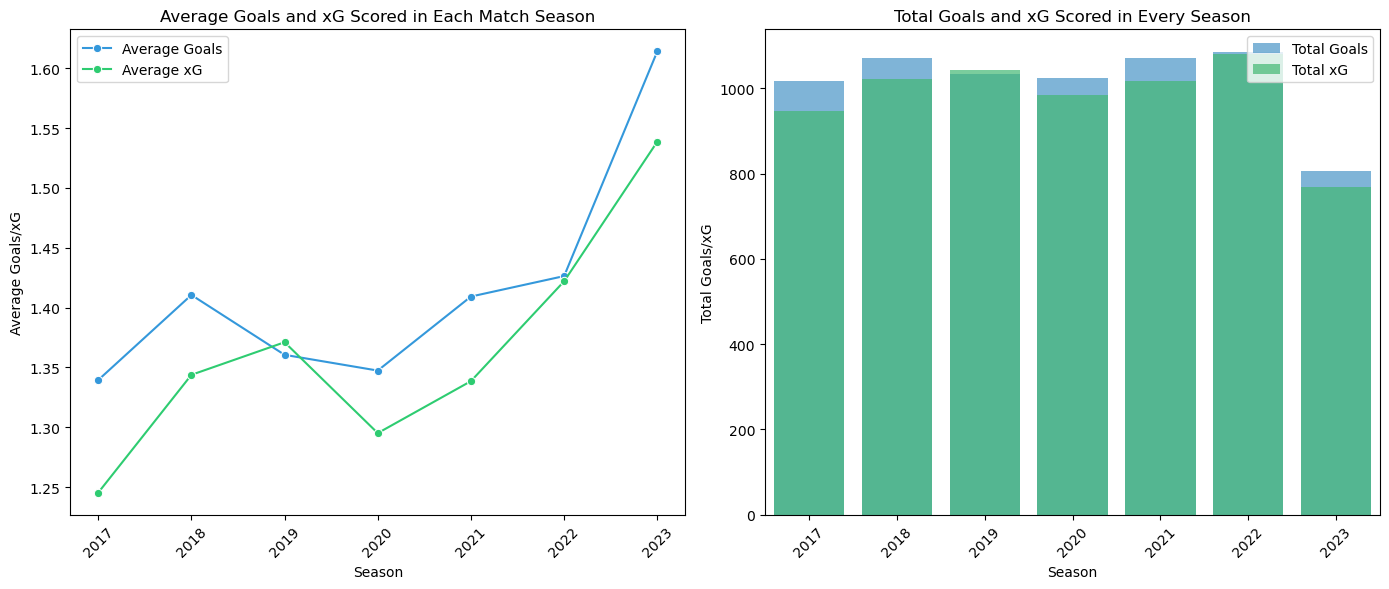

In [3]:
# Calculate average goals and xG scored in each match season over the seasons
avg_goals_xG_season = data.groupby('Season').agg({'GF': 'mean', 'xG': 'mean'}).reset_index()

# Calculate total goals and xG scored in every season
total_goals_xG_season = data.groupby('Season').agg({'GF': 'sum', 'xG': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(14, 6))

colors = ["#3498db", "#2ecc71"]

# Average goals and xG scored in each match season over the seasons
plt.subplot(1, 2, 1)
sns.lineplot(data=avg_goals_xG_season, x='Season', y='GF', label='Average Goals', marker='o', color=colors[0])
sns.lineplot(data=avg_goals_xG_season, x='Season', y='xG', label='Average xG', marker='o', color=colors[1])
plt.title('Average Goals and xG Scored in Each Match Season')
plt.xlabel('Season')
plt.ylabel('Average Goals/xG')
plt.xticks(rotation=45)
plt.legend()

# Total goals and xG scored in every season
plt.subplot(1, 2, 2)
sns.barplot(data=total_goals_xG_season, x='Season', y='GF', label='Total Goals', color=colors[0], alpha=0.7)
sns.barplot(data=total_goals_xG_season, x='Season', y='xG', label='Total xG', color=colors[1], alpha=0.7)
plt.title('Total Goals and xG Scored in Every Season')
plt.xlabel('Season')
plt.ylabel('Total Goals/xG')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

The image displays two charts that provide insights into goal-scoring trends across football seasons.

- Left Chart - Average Goals and Expected Goals (xG) Per Match Per Season:
    - This line graph shows the average number of actual goals (GF) and expected goals (xG) scored in each match for different seasons.
    - Both the average goals and xG metrics seem to follow a similar trend over the seasons, with the most recent season showing a noticeable increase, suggesting a rise in offensive performance or perhaps more opportunities being created.
- Right Chart - Total Goals and Expected Goals (xG) Per Season:
    - The bar chart compares the total goals scored and the total expected goals across entire seasons.
    - The total goals tend to be closely aligned with the total xG, indicating that the expected goals metric is a good predictor of the actual number of goals scored.
    - In the most recent season, there is a visible drop in both total goals and xG, which could be due to a shorter season, fewer games played, or a lower scoring rate overall.
    
Overall, these charts serve as useful tools for analyzing the effectiveness of teams' attacking play over time, as well as the predictive power of the xG metric in football analytics.

## 2) Let's focus on formation

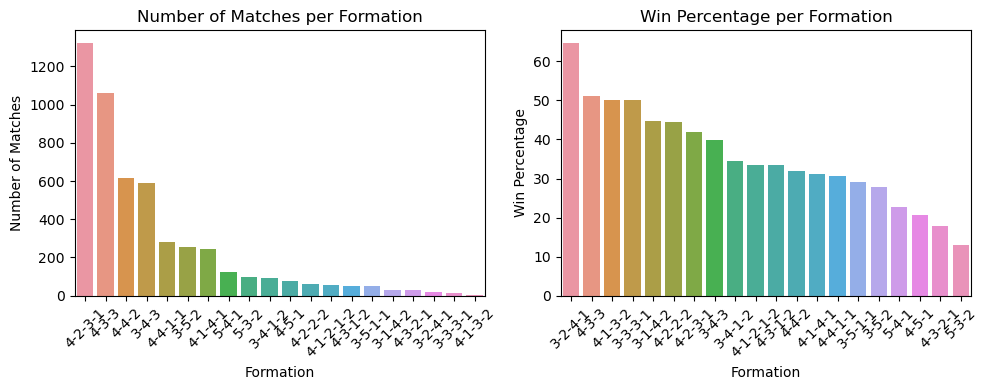

In [4]:
data['Win'] = data['Result'].apply(lambda x: 1 if 'W' in x else 0)

# Group by formation
formation_stats = data.groupby('Formation').agg({'Win': ['sum', 'count']}).reset_index()
formation_stats.columns = ['Formation', 'Wins', 'Total']
formation_stats['Win_Percentage'] = formation_stats['Wins'] / formation_stats['Total'] * 100

# Plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Number of Matches per Formation
sns.barplot(x='Formation', y='Total', data=formation_stats.sort_values('Total', ascending=False), ax=axs[0])
axs[0].set_title('Number of Matches per Formation')
axs[0].set_xlabel('Formation')
axs[0].set_ylabel('Number of Matches')
axs[0].tick_params(axis='x', rotation=45)

# Win Percentage per Formation
sns.barplot(x='Formation', y='Win_Percentage', data=formation_stats.sort_values('Win_Percentage', ascending=False), ax=axs[1])
axs[1].set_title('Win Percentage per Formation')
axs[1].set_xlabel('Formation')
axs[1].set_ylabel('Win Percentage')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Based on the visualizations created from the dataset:
- Formation Usage: The graphs show that certain formations are much more popular than others, indicating that teams have preferences for specific tactical setups depending on their players, strategy, or opposition. The most used formations likely align with contemporary tactical trends in football or may reflect formations that fit the available squad best.
- Winning Efficiency: The win percentage associated with each formation varies significantly. Some formations, despite being less frequently used, show higher win percentages. This could suggest that those formations are particularly effective under certain conditions or against specific types of opponents. Conversely, the more commonly used formations might not always yield the highest win rates but could be considered safer or more versatile options.
- Strategic Insights: Teams might benefit from adapting their formation to exploit specific weaknesses in their opponents, as indicated by the success rates of less common formations. Meanwhile, the staple formations, while not always the most successful in terms of win percentage, offer consistency and familiarity, which can be crucial in high-stakes or tightly contested matches.

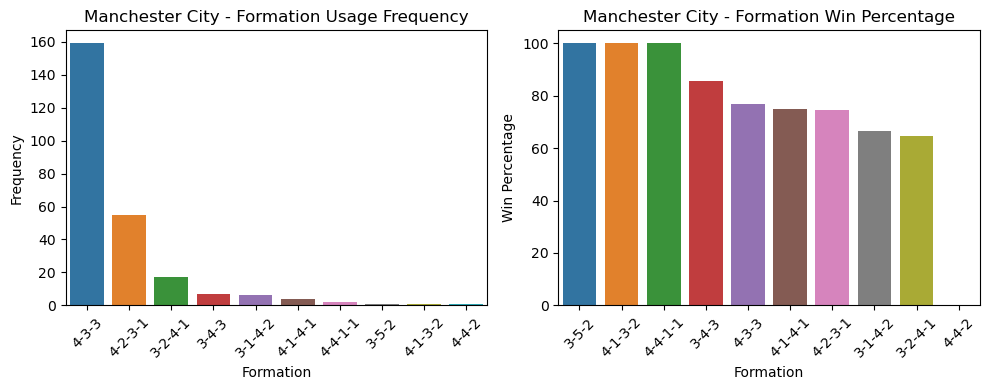

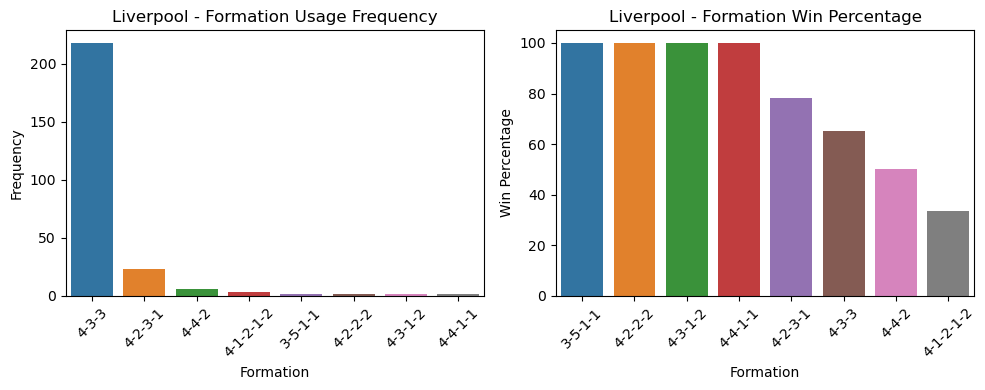

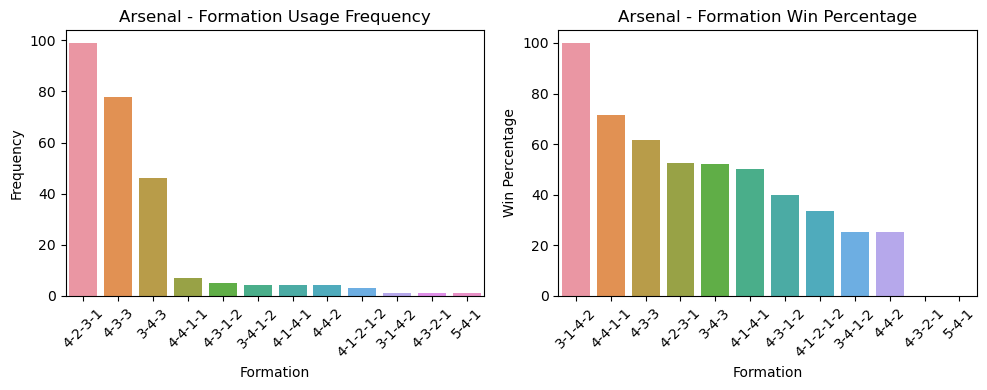

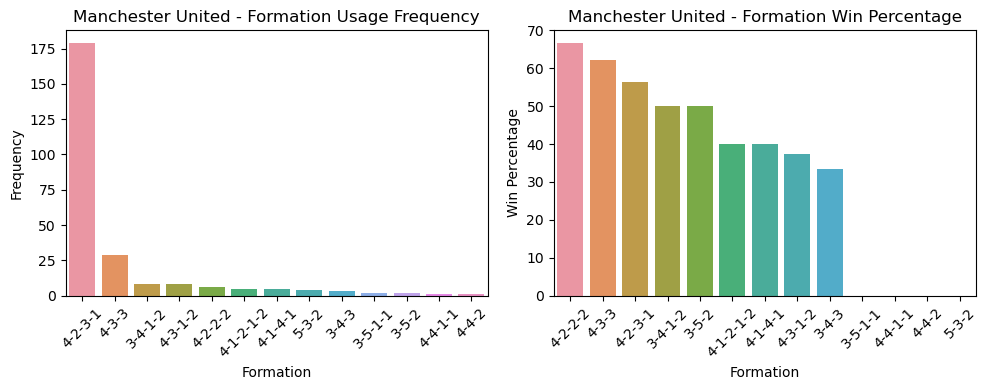

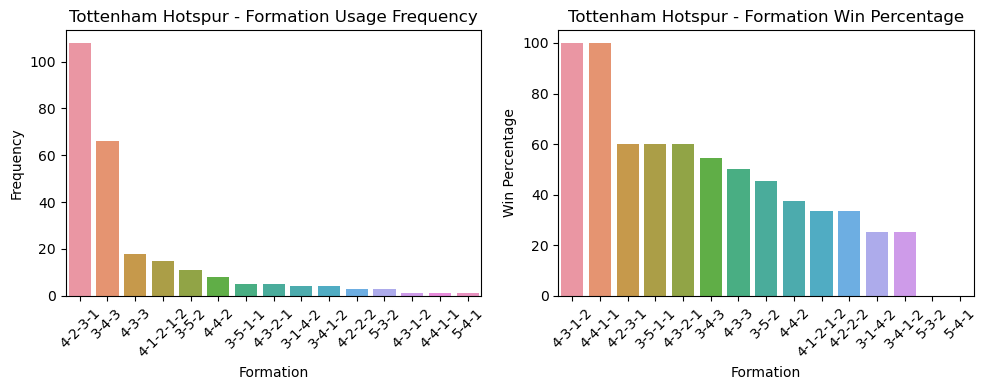

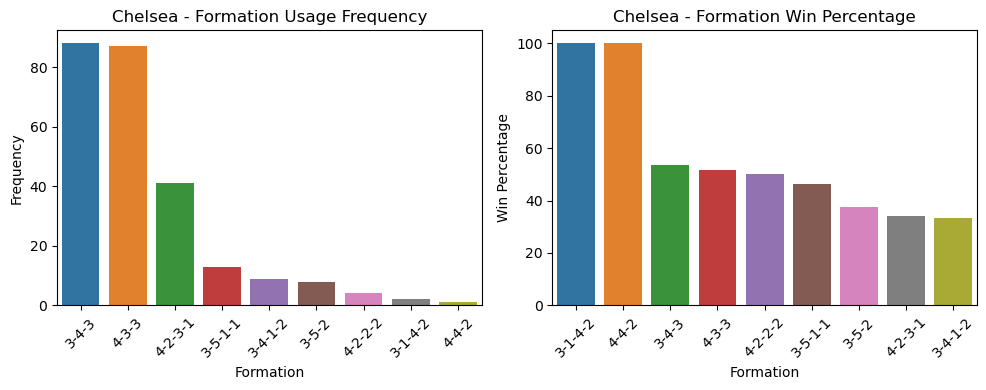

In [5]:
data['Win'] = data['Result'].apply(lambda x: 1 if 'W' in x else 0)

# Filtering data for the top teams and calculating formations' win percentages
top_teams = ['Manchester City', 'Liverpool', 'Arsenal', 'Manchester United', 'Tottenham Hotspur', 'Chelsea']
top_teams_data = data[data['Team'].isin(top_teams)]

# Group by team and formation
formation_usage = top_teams_data.groupby(['Team', 'Formation']).agg({'Win': ['sum', 'count']})
formation_usage.columns = ['Wins', 'Total']
formation_usage.reset_index(inplace=True)
formation_usage['Win_Percentage'] = (formation_usage['Wins'] / formation_usage['Total']) * 100

# Plotting for each team
for team in top_teams:
    team_data = formation_usage[formation_usage['Team'] == team]
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    sns.barplot(x='Formation', y='Total', data=team_data.sort_values('Total', ascending=False), ax=axs[0])
    axs[0].set_title(f'{team} - Formation Usage Frequency')
    axs[0].set_xlabel('Formation')
    axs[0].set_ylabel('Frequency')
    axs[0].tick_params(axis='x', rotation=45)
    
    sns.barplot(x='Formation', y='Win_Percentage', data=team_data.sort_values('Win_Percentage', ascending=False), ax=axs[1])
    axs[1].set_title(f'{team} - Formation Win Percentage')
    axs[1].set_xlabel('Formation')
    axs[1].set_ylabel('Win Percentage')
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

The combined visualization provides an insightful comparative analysis of the top six football teams based on their formation usage and respective win percentages. Here are some key observations from the visual analysis:

- **Manchester City** predominantly uses a 4-3-3 formation, which also boasts the highest win percentage among their formations, aligning with their strong overall performance.
- **Liverpool** similarly favors the 4-3-3 formation, achieving substantial success. This highlights the effectiveness of the 4-3-3 system in the English Premier League, especially among top teams.
- **Arsenal** displays a mix of formations with the 4-2-3-1 and 4-3-3 being the most frequently used. The 4-4-1-1, although less common, shows a high win rate, suggesting situational effectiveness.
- **Manchester United** also favors the 4-2-3-1 formation. Despite its frequent use, the win percentage is moderate, suggesting challenges in maximizing outcomes with this setup.
- **Tottenham Hotspur** and **Chelsea** show diversity in formation usage with no single formation overwhelmingly dominating. Chelsea’s use of the 3-4-3 and 3-4-2-1 formations reflects a strategic preference for three-at-the-back formations.
- The varied success rates across different formations used by these teams indicate strategic decisions tailored to match-specific dynamics, player availability, and opponent strategies.

This comprehensive overview aids in understanding each team's tactical flexibility and effectiveness, revealing how top teams adapt and optimize their strategies to maintain competitive advantages in the league.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

file_path = 'matches.csv'  
data = pd.read_csv(file_path)



categorical_features = ['Venue', 'Opponent', 'Captain', 'Referee', 'Season', 'Team', 'Day', 'Formation']
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

X = data[['Venue', 'Opponent', 'xG', 'xGA', 'Captain', 'Referee', 'Season', 'Team', 'Day', 'Formation']]
y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
y_dummy_pred = dummy_model.predict(X_test)
print(f"Baseline Accuracy: {accuracy_score(y_test, y_dummy_pred)}")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_rf_pred)}")
print(classification_report(y_test, y_rf_pred))

# importances = rf_model.feature_importances_
# features = X.columns
# sorted_indices = importances.argsort()

# plt.figure(figsize=(10, 7))
# plt.title('Feature Importances')
# plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
# plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
# plt.xlabel('Relative Importance')
# plt.show()


Baseline Accuracy: 0.3794466403162055
Random Forest Accuracy: 0.5741106719367589
              precision    recall  f1-score   support

           D       0.32      0.10      0.16       222
           L       0.58      0.68      0.62       384
           W       0.61      0.73      0.66       406

    accuracy                           0.57      1012
   macro avg       0.50      0.50      0.48      1012
weighted avg       0.53      0.57      0.54      1012



In [7]:
columns_of_interest = ['Venue', 'Opponent', 'xG', 'xGA', 'Captain', 'Referee', 'Season', 'Team', 'Result']

initial_row_count = data.shape[0]

data_cleaned = data.dropna(subset=columns_of_interest)

final_row_count = data_cleaned.shape[0]

rows_dropped = initial_row_count - final_row_count

initial_row_count, final_row_count, rows_dropped


(5060, 5060, 0)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

data_vis = data_cleaned.copy()
for column in ['Venue', 'Opponent', 'Captain', 'Referee', 'Season', 'Team', 'Day', 'Formation']:
    data_vis[column] = label_encoders[column].inverse_transform(data_vis[column])



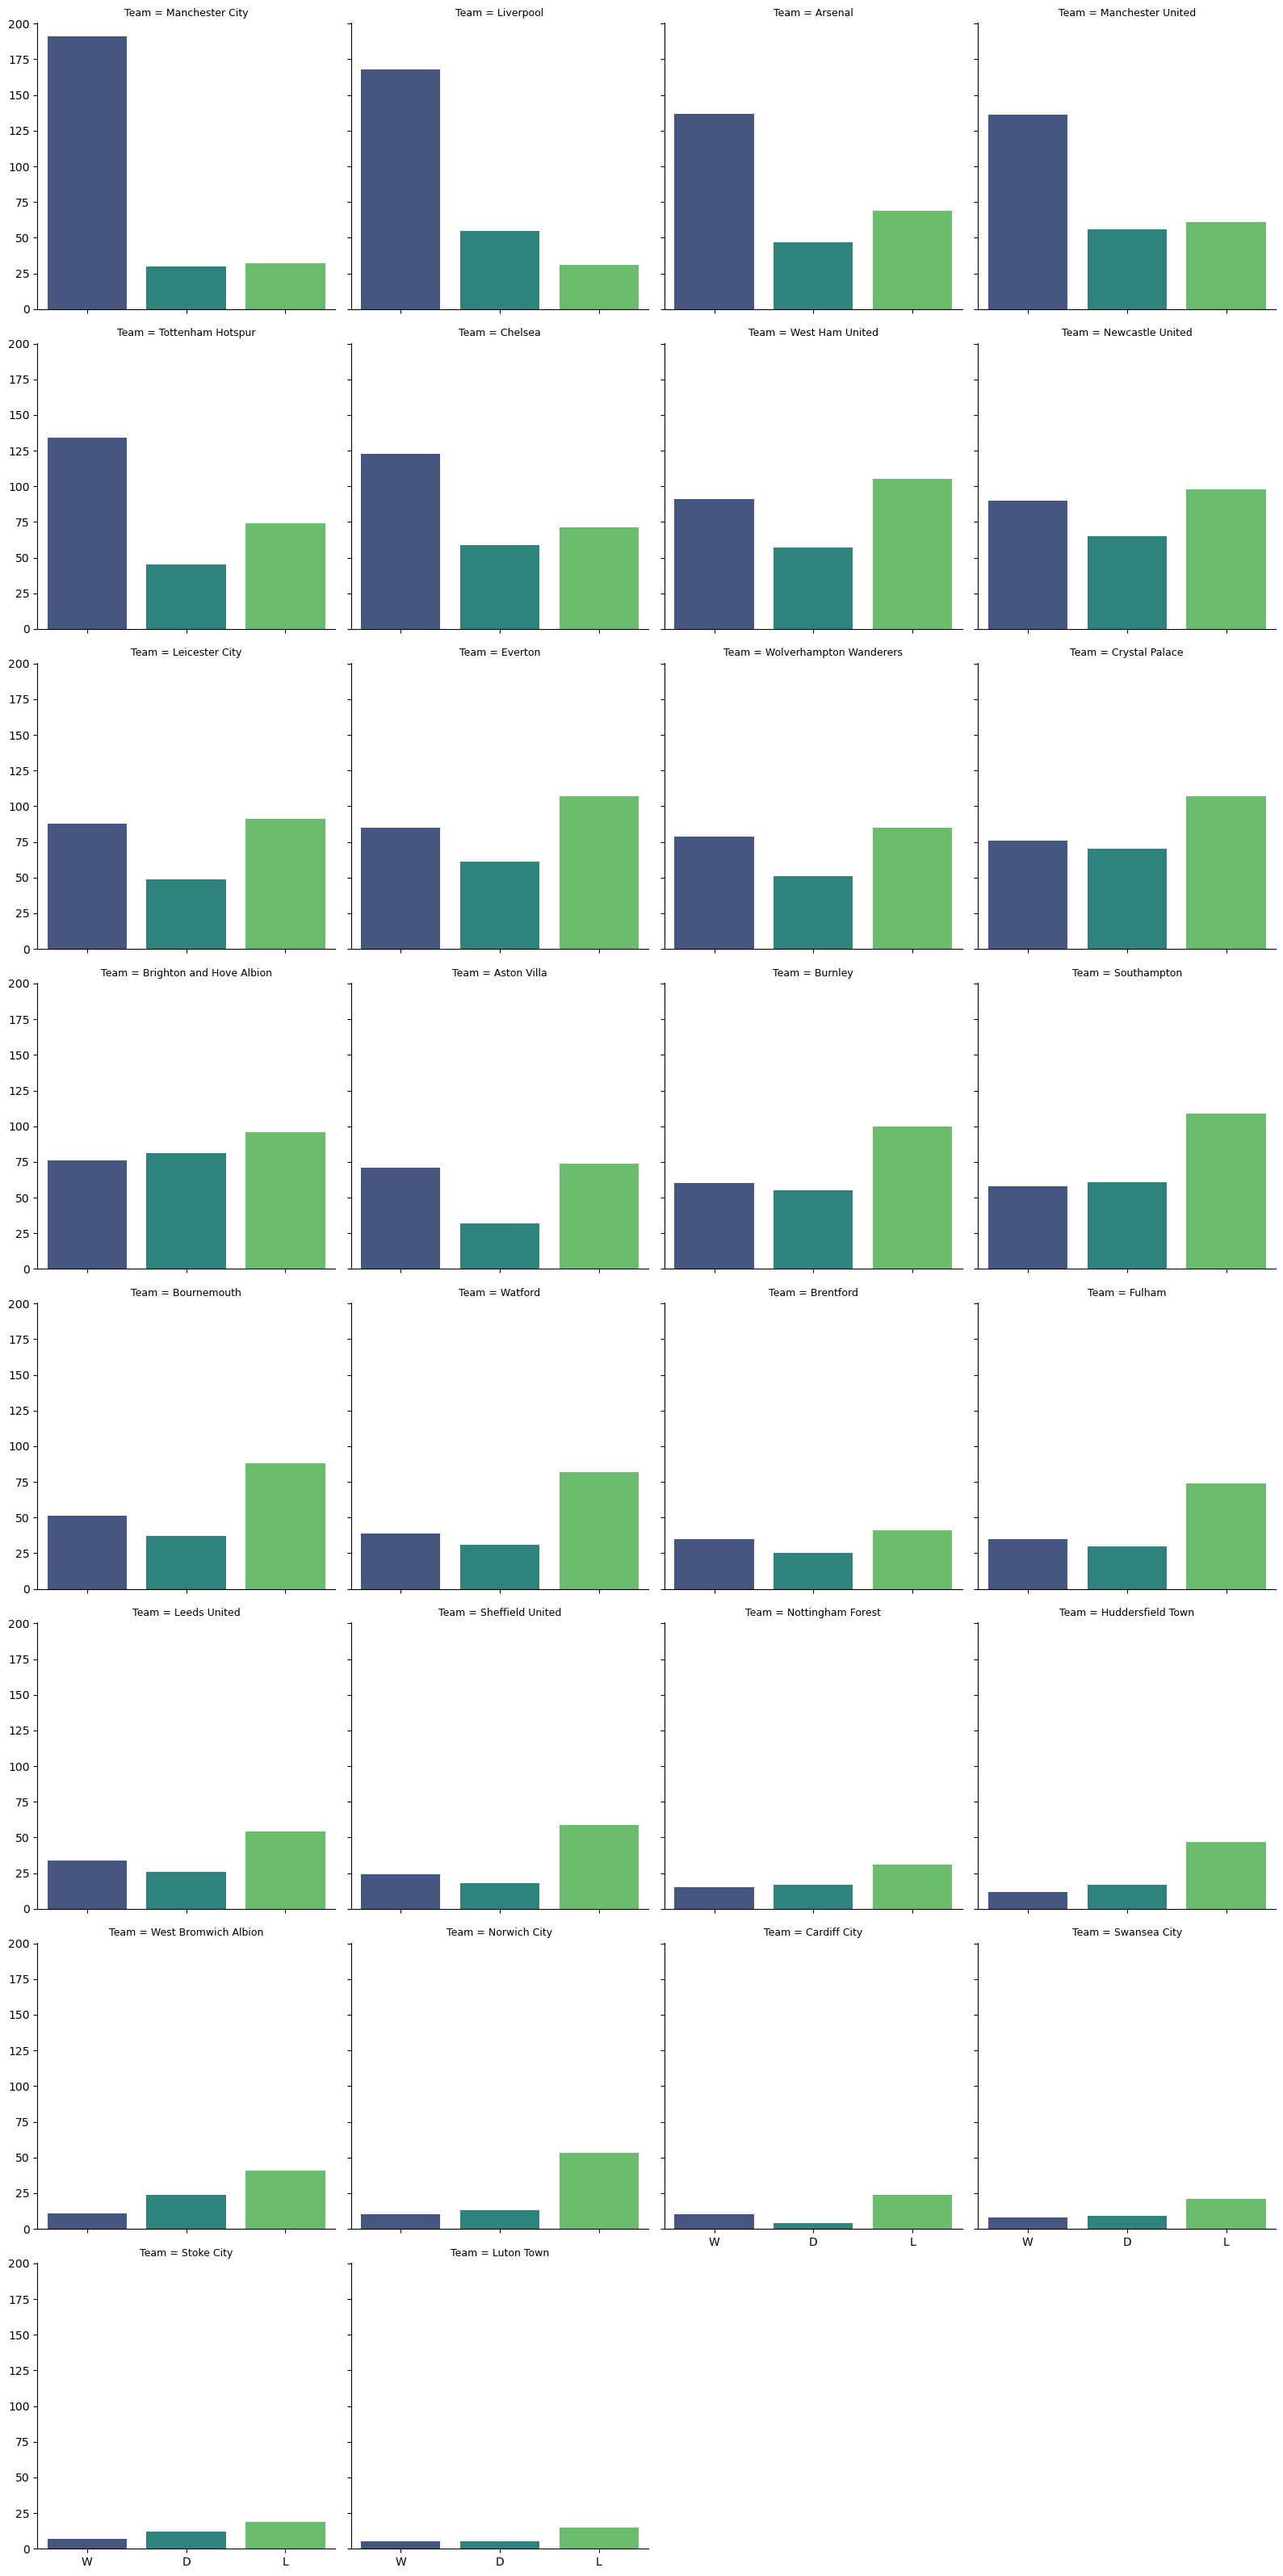

In [9]:

win_counts = data_vis[data_vis['Result'] == 'W'].groupby('Team')['Result'].count().sort_values(ascending=False)

data_vis_sorted = data_vis.set_index('Team').loc[win_counts.index].reset_index()

g_sorted = sns.FacetGrid(data_vis_sorted, col="Team", col_wrap=4, height=4, sharex=True, sharey=True)
g_sorted.map_dataframe(sns.countplot, "Result", order=['W', 'D', 'L'], palette='viridis')

for ax in g_sorted.axes.flatten():
    ax.set_title(ax.get_title(), fontsize=9)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


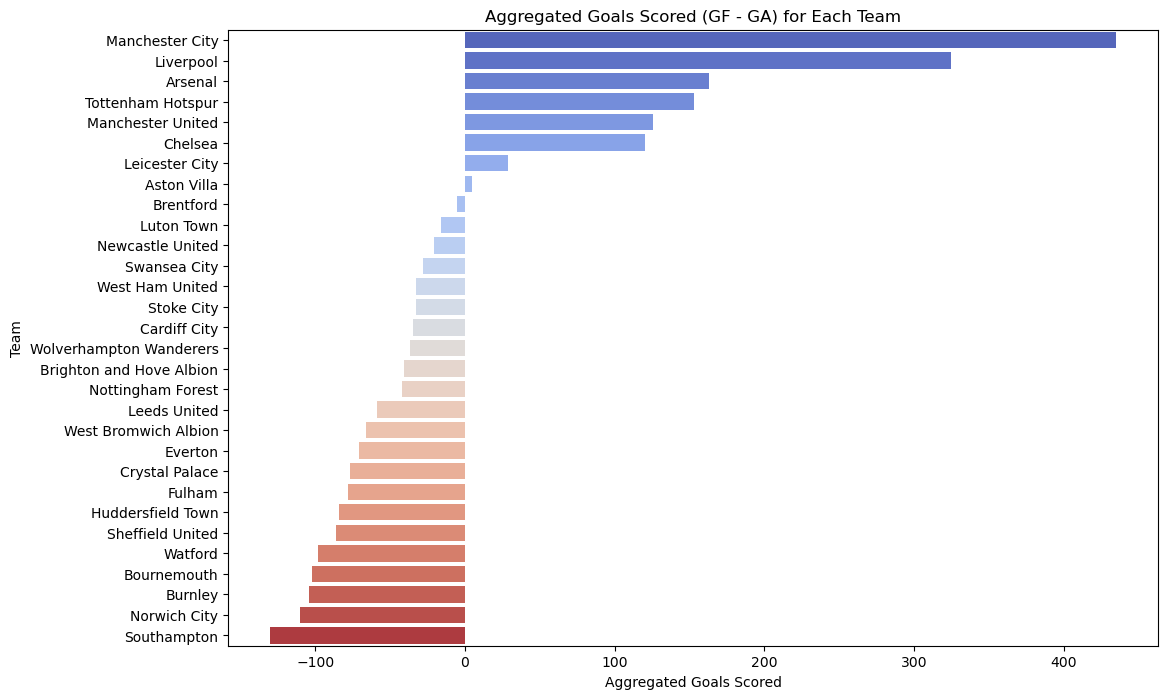

In [10]:
data_vis['Goals_Scored'] = data_vis['GF'] - data_vis['GA']
team_goals = data_vis.groupby('Team')['Goals_Scored'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=team_goals.values, y=team_goals.index, palette='coolwarm')
plt.title('Aggregated Goals Scored (GF - GA) for Each Team')
plt.xlabel('Aggregated Goals Scored')
plt.ylabel('Team')
plt.show()


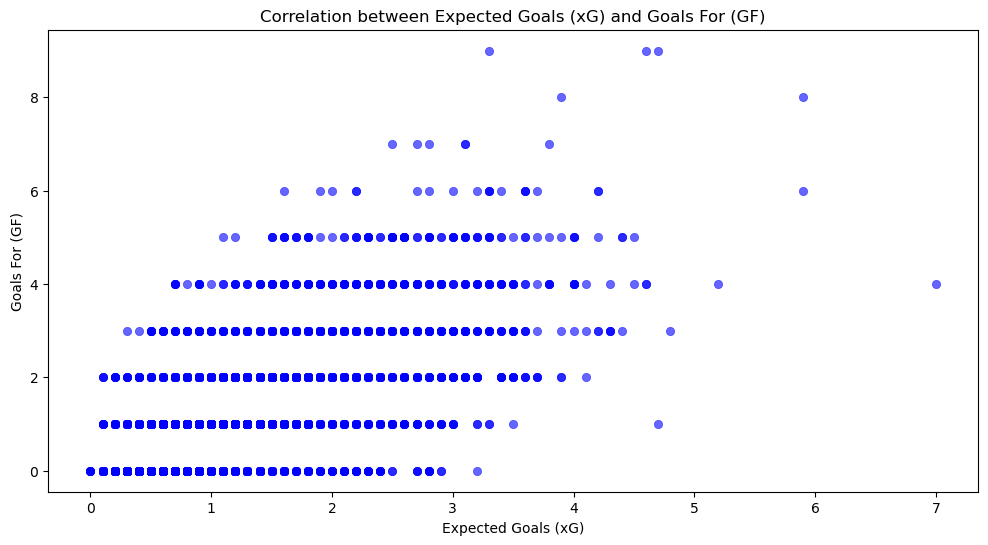

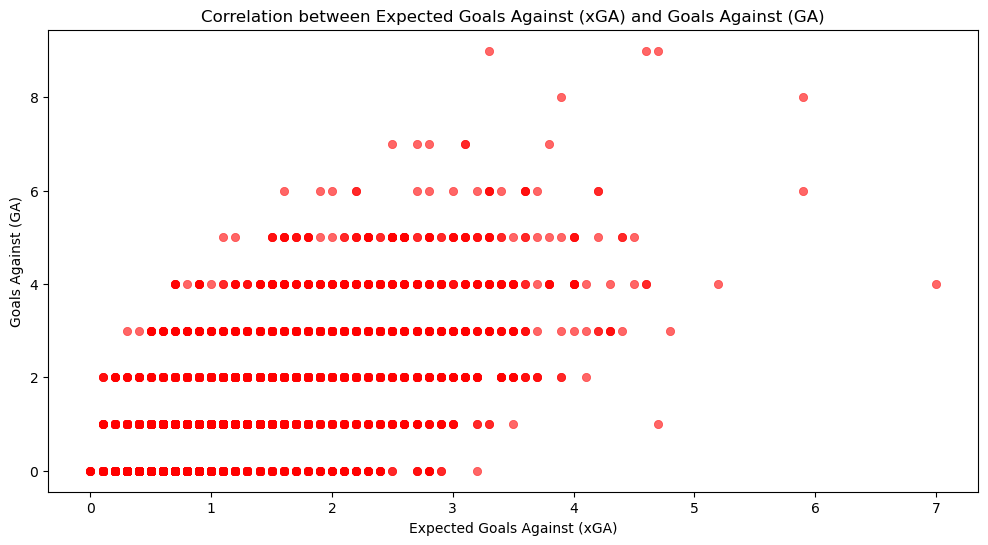

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_vis, x='xG', y='GF', alpha=0.6, edgecolor=None, color='blue')
plt.title('Correlation between Expected Goals (xG) and Goals For (GF)')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals For (GF)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_vis, x='xGA', y='GA', alpha=0.6, edgecolor=None, color='red')
plt.title('Correlation between Expected Goals Against (xGA) and Goals Against (GA)')
plt.xlabel('Expected Goals Against (xGA)')
plt.ylabel('Goals Against (GA)')
plt.show()


This analysis is based on data spanning 7 seasons: [2017, 2018, 2019, 2020, 2021, 2022, 2023].


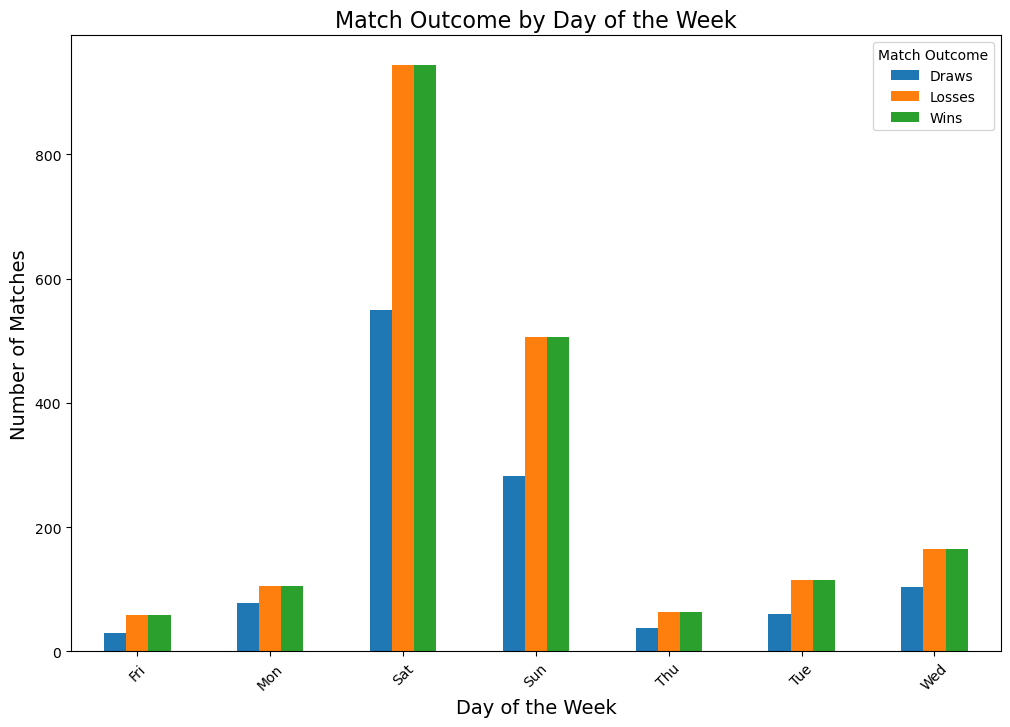

In [13]:
# Count the number of match outcomes by day of the week
matches_df = pd.read_csv('matches.csv')
match_outcomes_by_day = matches_df.groupby('Day')['Result'].value_counts().unstack().fillna(0)

# Plotting the bar charts
match_outcomes_by_day.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adding plot title and labels
plt.title('Match Outcome by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Match Outcome', labels=['Draws', 'Losses', 'Wins'])
print(f"This analysis is based on data spanning {len(matches_df['Season'].unique())} seasons: {sorted(matches_df['Season'].unique())}.")

# Show plot
plt.show()


c:\Users\rishi\anaconda3\envs\Main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rishi\anaconda3\envs\Main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


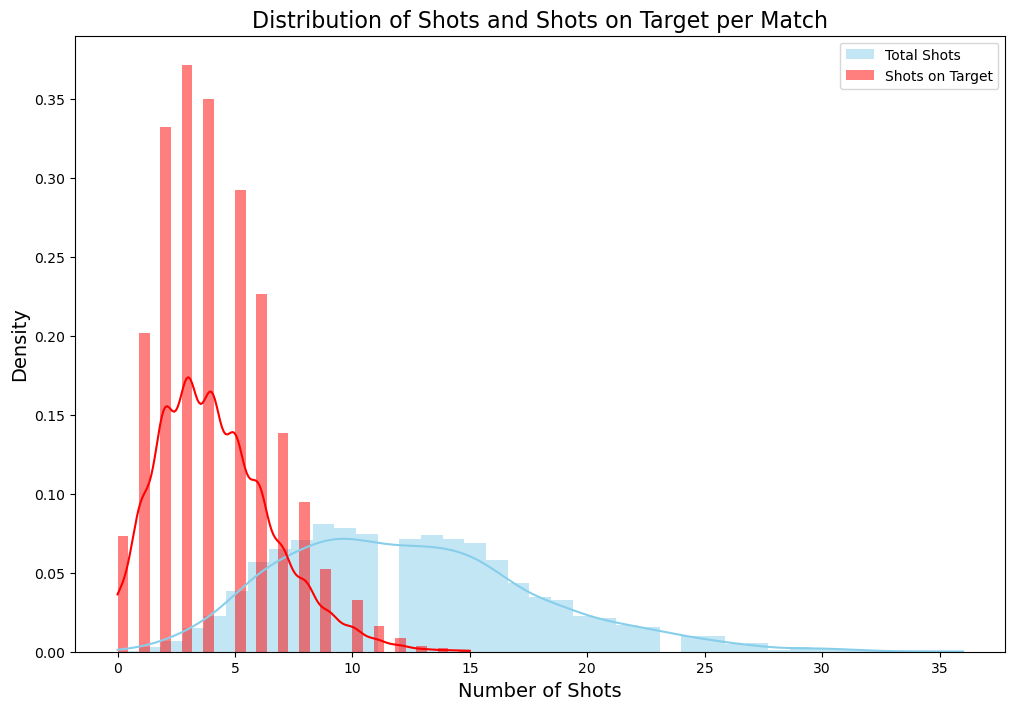

In [15]:
plt.figure(figsize=(12, 8))

# Histogram for Shots
sns.histplot(matches_df['Sh'], color="skyblue", label='Total Shots', kde=True, stat="density", linewidth=0)

# Histogram for Shots on Target (SoT)
sns.histplot(matches_df['SoT'], color="red", label='Shots on Target', kde=True, stat="density", linewidth=0)

# Adding plot title and labels
plt.title('Distribution of Shots and Shots on Target per Match', fontsize=16)
plt.xlabel('Number of Shots', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

# Show plot
plt.show()


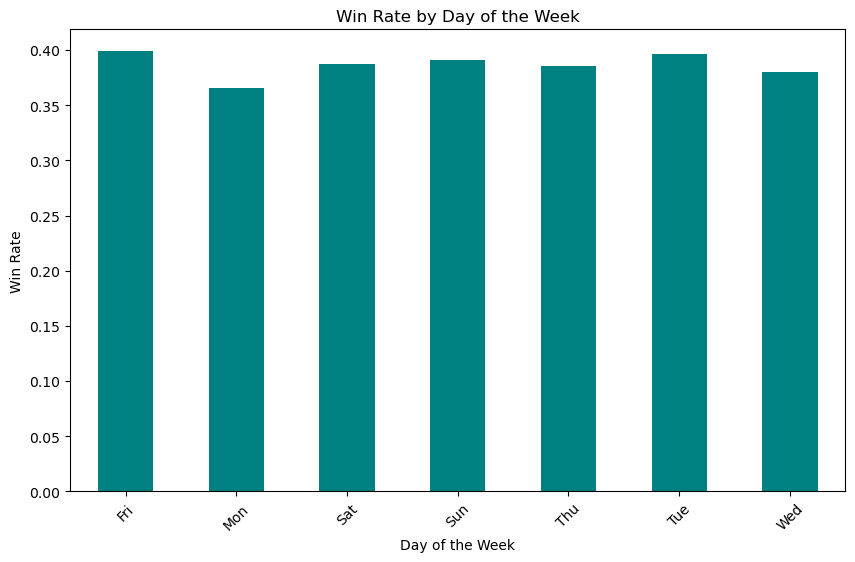

In [16]:
# Calculating win rates by day
match_outcomes = matches_df.groupby('Day')['Result'].value_counts().unstack()
match_outcomes['Win Rate'] = match_outcomes['W'] / match_outcomes.sum(axis=1)

# Plotting
match_outcomes['Win Rate'].plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Win Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.show()


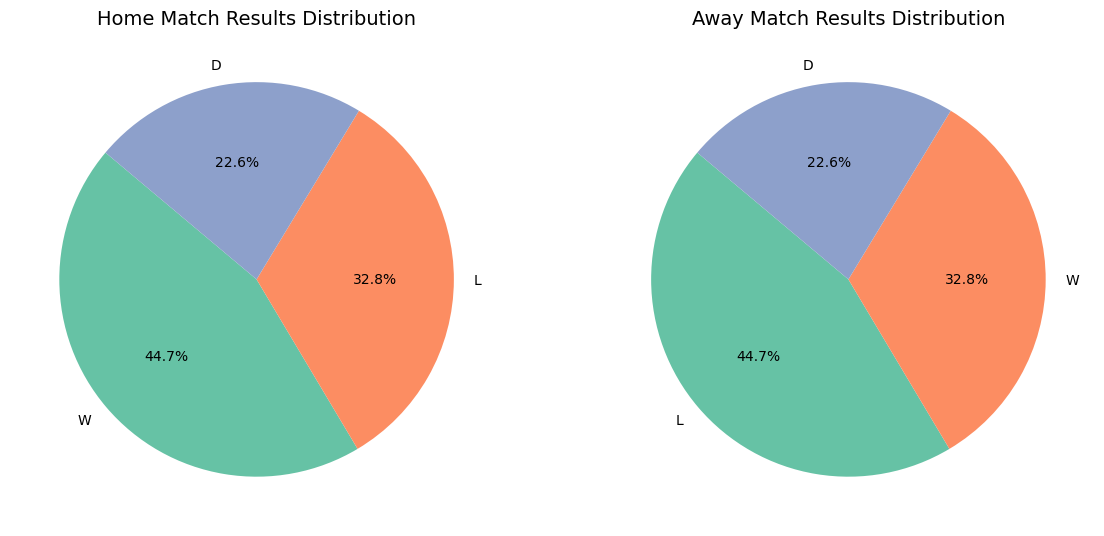

In [17]:
# Separate the data into home and away
home_matches = matches_df[matches_df['Venue'] == 'Home']
away_matches = matches_df[matches_df['Venue'] == 'Away']

# Count the match results for home and away
home_results_count = home_matches['Result'].value_counts()
away_results_count = away_matches['Result'].value_counts()

# Set up the matplotlib figure for pie charts
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for home match results
ax[0].pie(home_results_count, labels=home_results_count.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
ax[0].set_title('Home Match Results Distribution', fontsize=14)

# Pie chart for away match results
ax[1].pie(away_results_count, labels=away_results_count.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
ax[1].set_title('Away Match Results Distribution', fontsize=14)

# Show plot
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\rishi\AppData\Local\Temp\ipykernel_25292\1022119148.py:2: SyntaxWarning: invalid escape sequence '\d'
  matches_df['Matchweek Numeric'] = matches_df['Round'].str.extract('(\d+)').astype(float)
c:\Users\rishi\anaconda3\envs\Main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rishi\anaconda3\envs\Main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rishi\anaconda3\envs\Main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remov

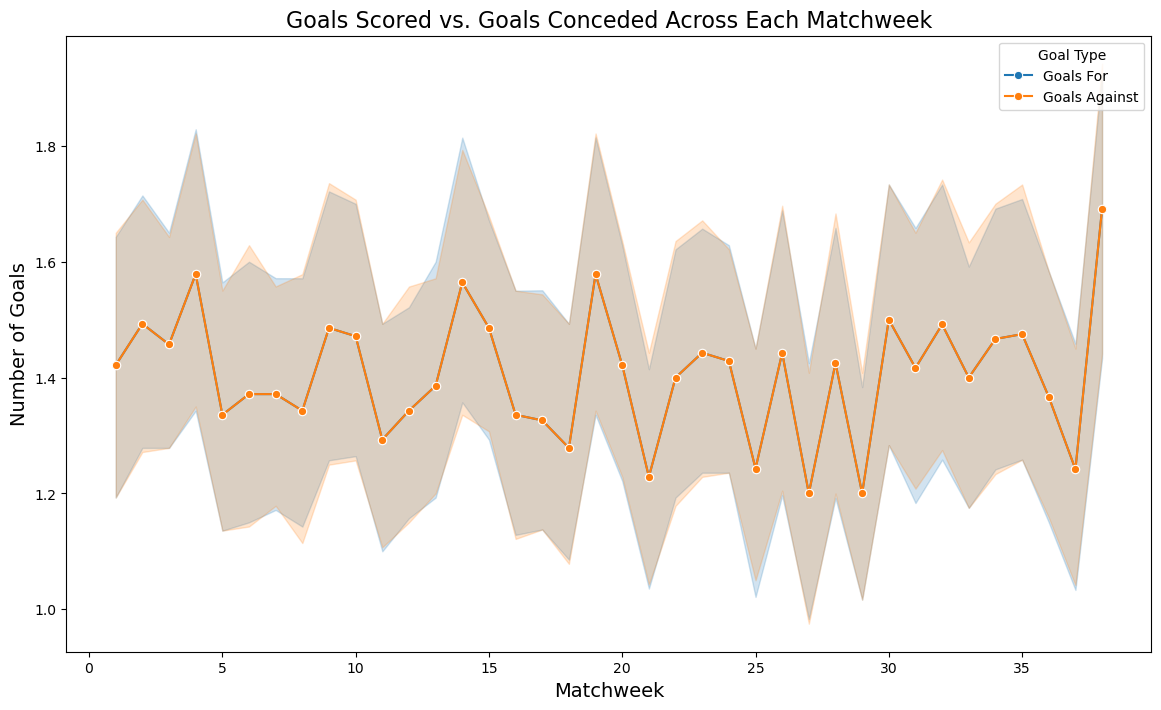

In [18]:
# Convert Matchweek to numeric values for better plotting
matches_df['Matchweek Numeric'] = matches_df['Round'].str.extract('(\d+)').astype(float)

# Sorting values by Matchweek Numeric to ensure correct order in the plot
matches_df_sorted = matches_df.sort_values('Matchweek Numeric')

# Creating the line graph
plt.figure(figsize=(14, 8))
sns.lineplot(x='Matchweek Numeric', y='GF', data=matches_df_sorted, label='Goals For', marker='o')
sns.lineplot(x='Matchweek Numeric', y='GA', data=matches_df_sorted, label='Goals Against', marker='o')

# Adding plot title and labels
plt.title('Goals Scored vs. Goals Conceded Across Each Matchweek', fontsize=16)
plt.xlabel('Matchweek', fontsize=14)
plt.ylabel('Number of Goals', fontsize=14)
plt.legend(title='Goal Type')

# Show plot
plt.show()

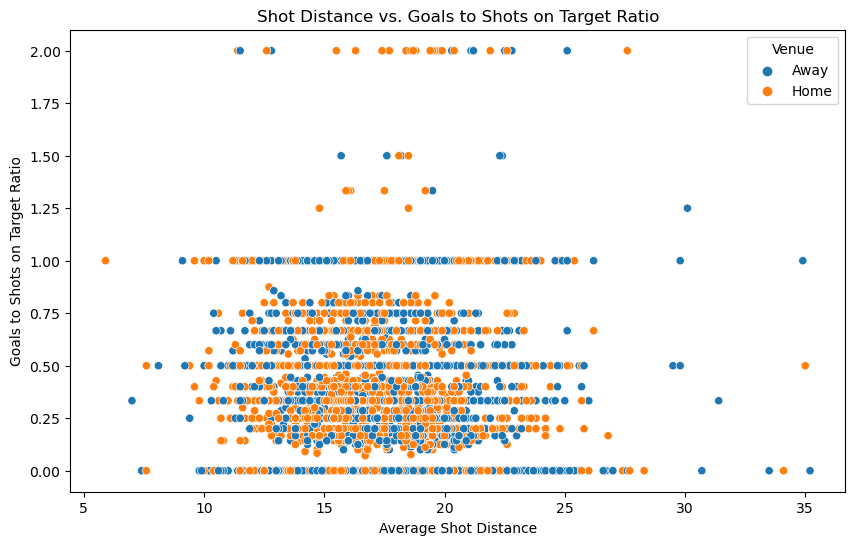

In [19]:
# Calculating the ratio of Goals to Shots on Target for each match
matches_df['Goals to SoT Ratio'] = matches_df['GF'] / matches_df['SoT']

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=matches_df, x='Dist', y='Goals to SoT Ratio', hue='Venue')
plt.title('Shot Distance vs. Goals to Shots on Target Ratio')
plt.xlabel('Average Shot Distance')
plt.ylabel('Goals to Shots on Target Ratio')
plt.legend(title='Venue')
plt.show()


In [28]:
data = matches

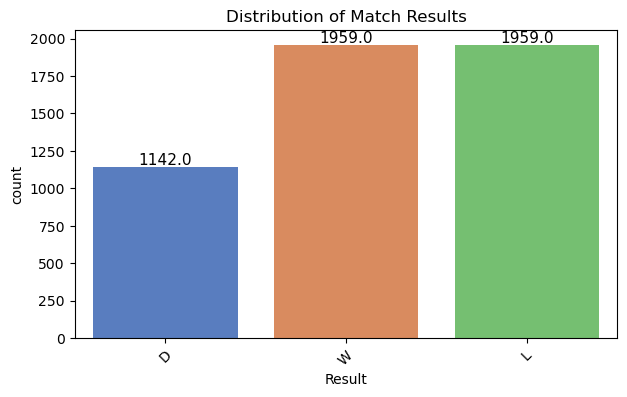

In [22]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=matches, x='Result', palette="muted")
plt.title('Distribution of Match Results')
plt.xticks(rotation=45)

# Annotate numbers inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

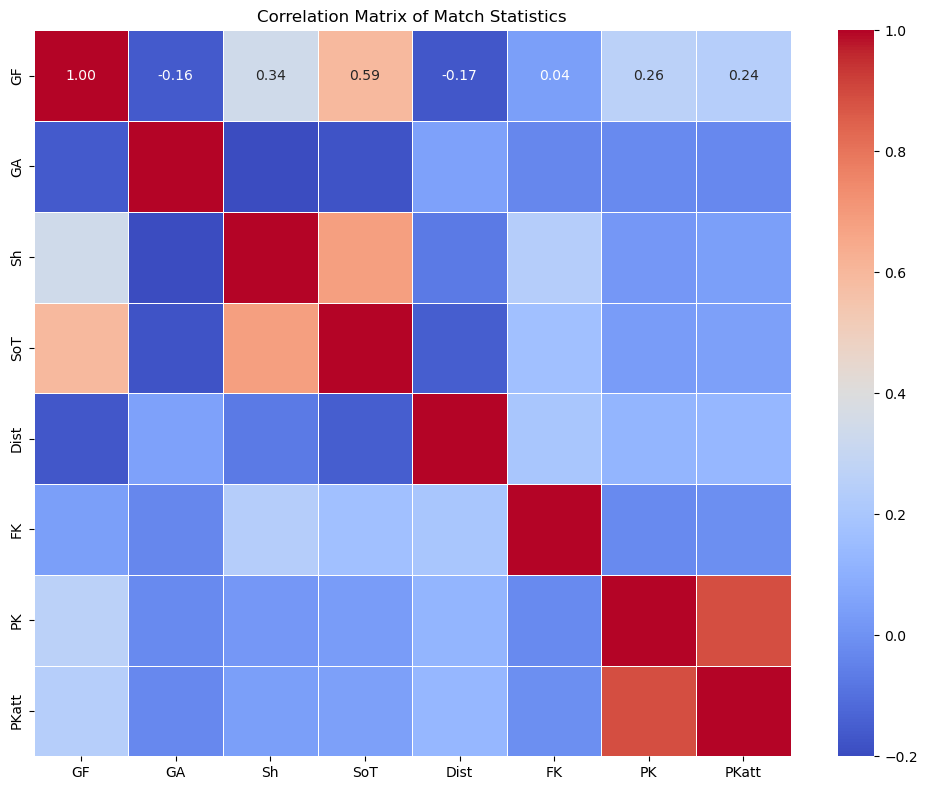

In [23]:
correlation_metrics = ['GF', 'GA', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt']
correlation = matches[correlation_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Match Statistics')
plt.tight_layout()
plt.show()


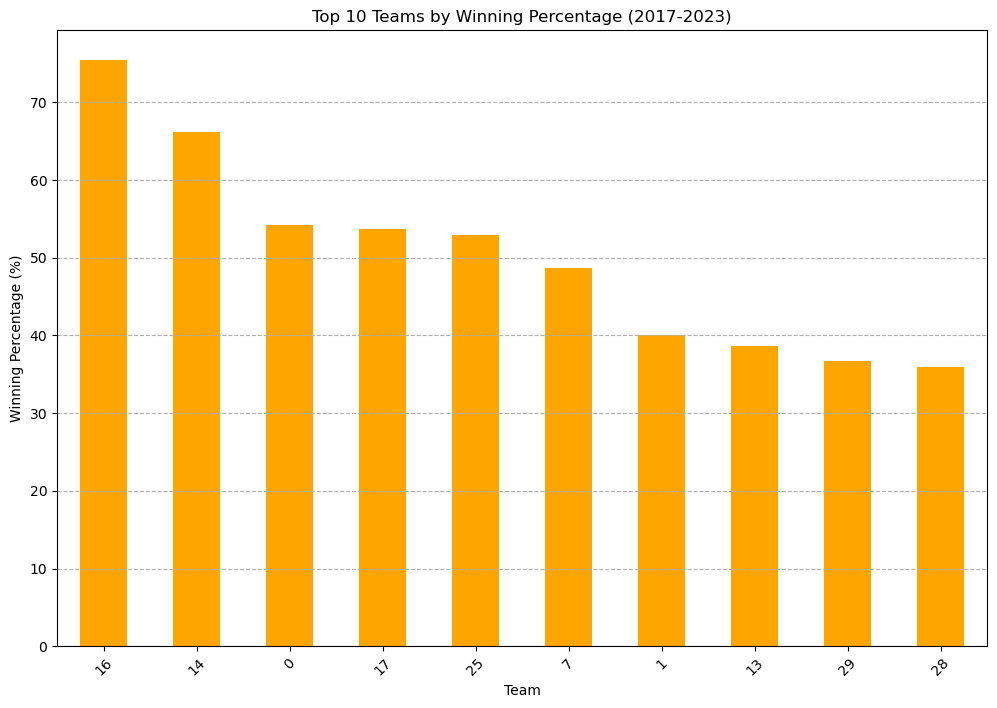

In [24]:
wins = matches['Result'] == 'W'
win_count = matches[wins].groupby('Team').size()
total_matches = matches.groupby('Team').size()
winning_percentage = (win_count / total_matches) * 100
winning_percentage_sorted = winning_percentage.sort_values(ascending=False)
top_teams = winning_percentage_sorted.head(10)

plt.figure(figsize=(12, 8))
top_teams.plot(kind='bar', color='orange')
plt.title('Top 10 Teams by Winning Percentage (2017-2023)')
plt.xlabel('Team')
plt.ylabel('Winning Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

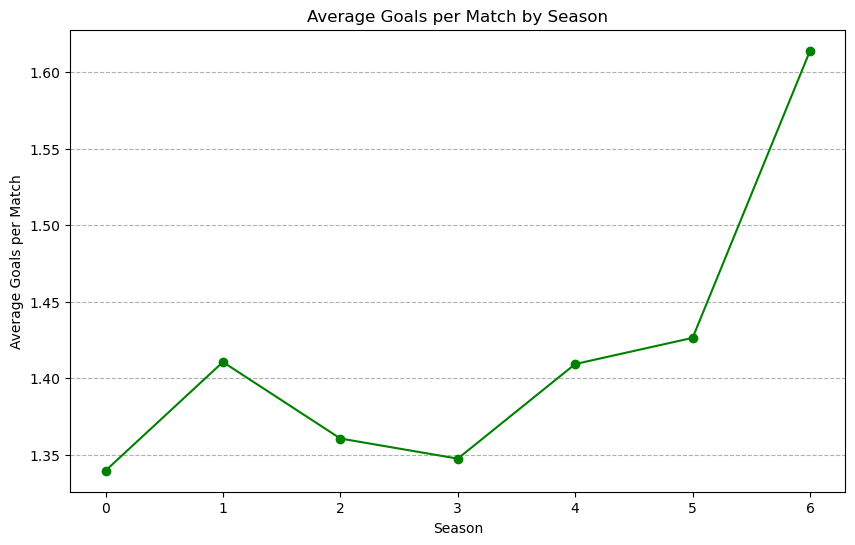

In [25]:
average_goals_per_season = matches.groupby('Season')['GF'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_goals_per_season.plot(kind='line', marker='o', color='green')
plt.title('Average Goals per Match by Season')
plt.xlabel('Season')
plt.ylabel('Average Goals per Match')
plt.grid(axis='y', linestyle='--')
plt.show()

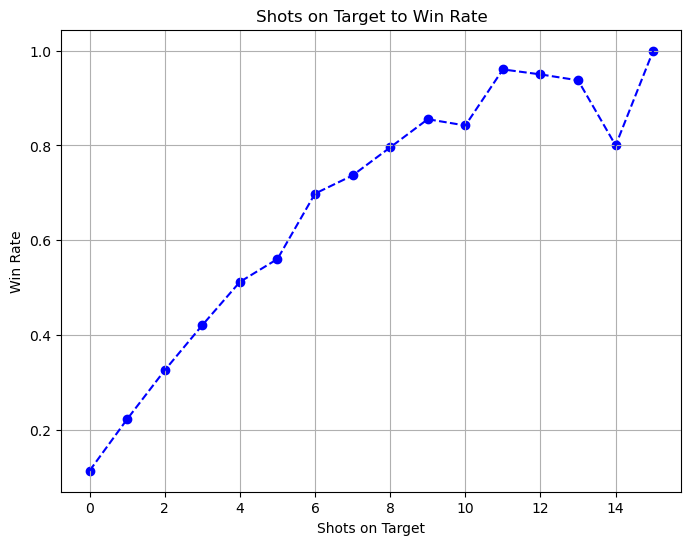

In [26]:
matches['Result_Num'] = matches['Result'].map({'W': 1, 'D': 0.5, 'L': 0})
win_rate_by_sot = matches.groupby('SoT')['Result_Num'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(win_rate_by_sot['SoT'], win_rate_by_sot['Result_Num'], color='blue')
plt.plot(win_rate_by_sot['SoT'], win_rate_by_sot['Result_Num'], color='blue', linestyle='--')

plt.title('Shots on Target to Win Rate')
plt.xlabel('Shots on Target')
plt.ylabel('Win Rate')
plt.grid(True)
plt.show()


In [32]:
matches = pd.read_csv('matches.csv', index_col=0)
matches.head()
data = matches

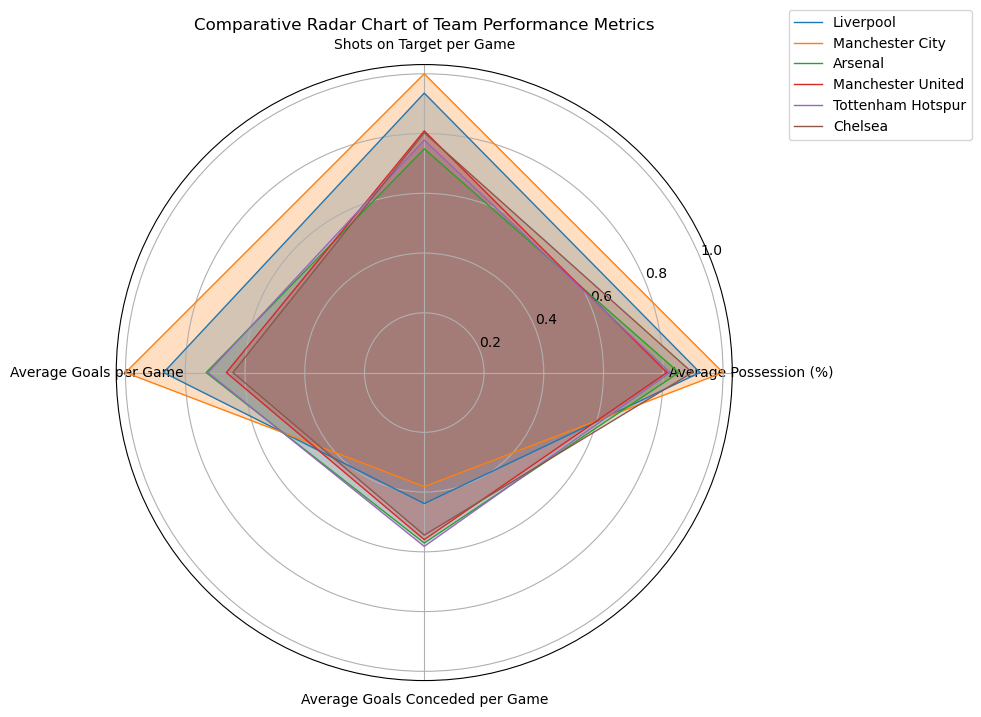

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi


# Calculate the metrics
metrics = {
    'Average Possession (%)': data.groupby('Team')['Poss'].mean(),
    'Shots on Target per Game': data.groupby('Team')['SoT'].mean(),
    'Average Goals per Game': data.groupby('Team')['GF'].mean(),
    'Average Goals Conceded per Game': data.groupby('Team')['GA'].mean(),
}

# Normalize these metrics
normalized_data = pd.DataFrame()
for key, series in metrics.items():
    normalized_data[key] = series / series.max()

# Select teams to compare
teams = ['Liverpool', 'Manchester City', 'Arsenal','Manchester United','Tottenham Hotspur','Chelsea']  
selected_team_data = normalized_data.loc[teams]

# Setup the radar chart
labels = normalized_data.columns
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Circular closure

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each team's metrics
for idx, row in selected_team_data.iterrows():
    data = row.tolist()
    data += data[:1]  # Circular closure
    ax.plot(angles, data, linewidth=1, linestyle='solid', label=idx)
    ax.fill(angles, data, alpha=0.25)

ax.set_thetagrids([a * 180 / pi for a in angles[:-1]], labels)

plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
plt.title('Comparative Radar Chart of Team Performance Metrics')
plt.show()
